## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


So in this case, we can use a Supervised Learning Approach,
specifically a Linear Regression model


In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from lab_utils_uni import plt_stationary, plt_gradients
import lab_utils_common
plt.style.use("./deeplearning.mplstyle")

In [21]:
# create our arrays to hold each column (for size and for price)
x_train = np.array([1.0, 2.0]) # size (1000sqft)
y_train = np.array([300.0, 500.0]) # price (in per $1000)

print(x_train, np.shape(x_train))
print(y_train, np.shape(y_train))

[1. 2.] (2,)
[300. 500.] (2,)


## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [22]:
import math

def compute_cost(X, Y, w, b):
    # define the number of training samples (to be of same size as X)
    m = X.shape[0]
    print("Number of samples: " + str(m))
    # define variable to store sum
    cost_sum = 0    
    for i in range(m):
        f_wb = w * X[i] + b
        local_cost = math.pow(f_wb - Y[i], 2)
        cost_sum += local_cost
    result = (1 / (2 / m)) * cost_sum
    return result


In [23]:
print(compute_cost(x_train, y_train, 1, 2))

Number of samples: 2
334225.0


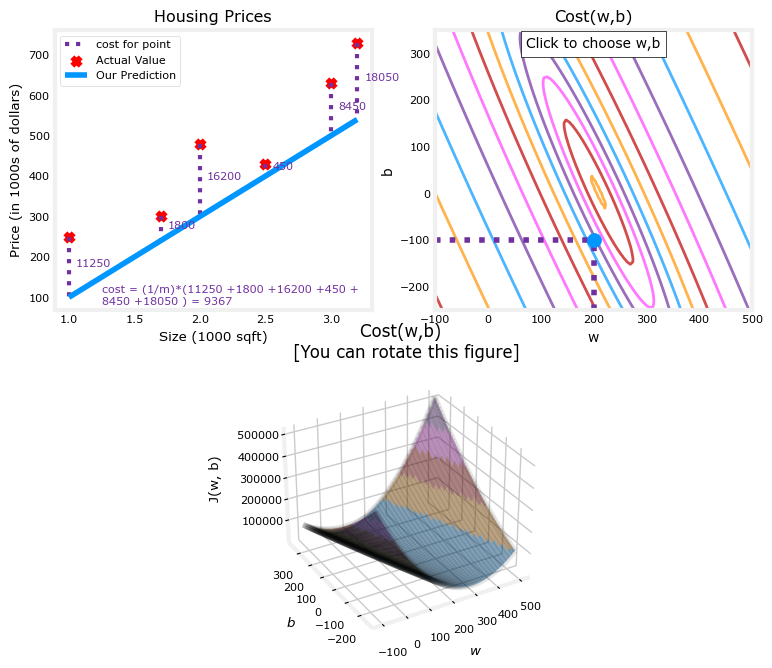

In [24]:
import numpy as np

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

plt.close("all")
fig, ax, items = plt_stationary(x_train, y_train)

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In BATCH GRADIENT DESCENT, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


Difference between normal gradient descent VS batch gradient descent:
    
    - Normal gradient descent works as the gradient is computed by using one training example
        at a time -> more efficient but gradient might not be as accurate
    
    - Batch gradient descent works as the gradient is computed using all the training 
        examples in each iteration. Can be inefficient but gradient is ACCURATE and converges.




<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn to minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each element represent the value at a given row of $X$.
<a id="computeCost"></a>


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

# Implementing Gradient Descent

-> we need 3 functions:

    - `compute_gradient`using the equations involving partial derivatives
    - `compute_cost` using the normal MSE equation
    - `gradient_descent` which will use compute_gradient and compute_cost

# compute_gradient:

* conventions:
    * e.g. $\frac{\partial J(w,b)}{\partial w}$  will be `dj_dw`.

In [25]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    # iterate over m (number of samples and we want to find gradient for each)
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb-y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        # add these local gradients for w and b 
        dj_db += dj_db_i
        dj_dw += dj_dw_i

        dj_db = dj_db / m
        dj_dw = dj_dw / m
    
    return dj_dw, dj_db
    

Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of samples: 6
Number of sam

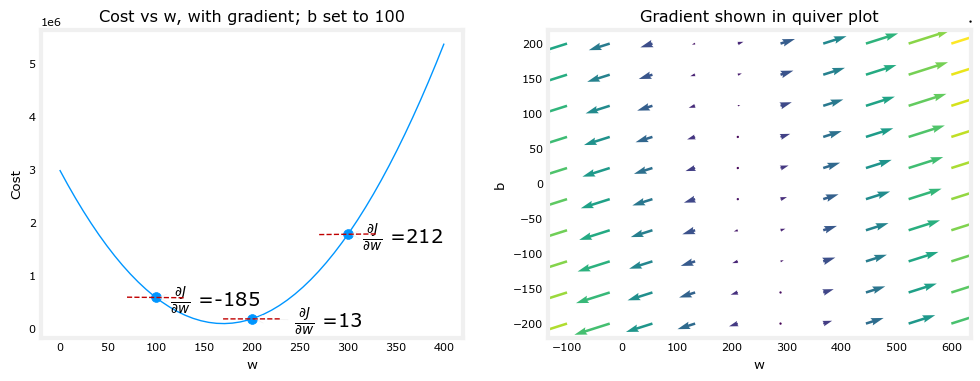

In [26]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

# gradient_descent

* Now using the cost_function adn gradient_function we can compute the gradient descent

In [27]:
def gradient_descent(x, y, input_w, input_b, alpha, num_iters, compute_cost, compute_gradient):
    # an array to store the cost J and w at each iteration for graphing
    J_buffer = []
    p_buffer = []
    b = input_b
    w = input_w

    for i in range(num_iters):
        # calculating the gradient and updating the parameters using the gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w, b)


        # update parameters using equation above        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # save cost j at each iteration 
        if i<100000:
            J_buffer.append(compute_cost(x, y, w, b))
            p_buffer.append([w, b])

        # print cost at every interval
            print(f"Iteration {i:4}: Cost {J_buffer[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_buffer, p_buffer # can be used for graphing


In [28]:
# initialize parameters
w_init = 0
b_init = 0

iteraions = 100
tmp_alpha = 1.0e-2

w_final, b_final, J_buffer, p_buffer = gradient_descent(x_train, y_train, w_init, b_init, 
                                                        tmp_alpha, iteraions, compute_cost, 
                                                        compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Number of samples: 6
Iteration    0: Cost 4.28e+06  dj_dw: -4.476e+02, dj_db: -1.416e+02   w:  4.476e+00, b: 1.41572e+00
Number of samples: 6
Iteration    1: Cost 4.08e+06  dj_dw: -4.378e+02, dj_db: -1.385e+02   w:  8.854e+00, b: 2.80040e+00
Number of samples: 6
Iteration    2: Cost 3.89e+06  dj_dw: -4.282e+02, dj_db: -1.354e+02   w:  1.314e+01, b: 4.15473e+00
Number of samples: 6
Iteration    3: Cost 3.71e+06  dj_dw: -4.189e+02, dj_db: -1.325e+02   w:  1.733e+01, b: 5.47937e+00
Number of samples: 6
Iteration    4: Cost 3.53e+06  dj_dw: -4.097e+02, dj_db: -1.296e+02   w:  2.142e+01, b: 6.77498e+00
Number of samples: 6
Iteration    5: Cost 3.37e+06  dj_dw: -4.007e+02, dj_db: -1.267e+02   w:  2.543e+01, b: 8.04218e+00
Number of samples: 6
Iteration    6: Cost 3.21e+06  dj_dw: -3.920e+02, dj_db: -1.239e+02   w:  2.935e+01, b: 9.28159e+00
Number of samples: 6
Iteration    7: Cost 3.06e+06  dj_dw: -3.834e+02, dj_db: -1.212e+02   w:  3.318e+01, b: 1.04938e+01
Number of samples: 6
Iteration  

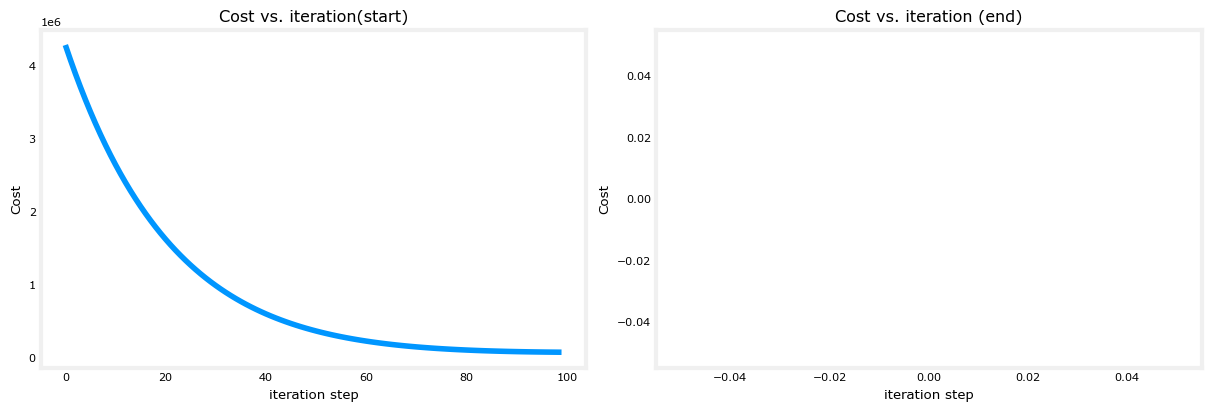

In [29]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_buffer[:100])
ax2.plot(1000 + np.arange(len(J_buffer[1000:])), J_buffer[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# graph should show the cost being minimized

In [35]:
import time
import random

w = [float(random.randint(0, 10)) for _ in range(3)]
b = 5
x = [float(random.randint(0, 10)) for _ in range(3)] 

t0 = time.perf_counter()

f = w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + b
print(f)
t1 = time.perf_counter()


elapsed = t1-t0
print(str(elapsed) +  " seconds")

51.0
0.0001973999897018075 seconds


In [34]:
import time
import random

w = [float(random.randint(0, 10)) for _ in range(3)]
b = 5
x = [float(random.randint(0, 10)) for _ in range(3)] 

t0 = time.perf_counter()

f = np.dot(w, x) + b
print(f)
t1 = time.perf_counter()


elapsed = t1-t0
print(str(elapsed) +  " seconds")

38.0
0.0002717000315897167 seconds


In [36]:
import time
import random

w = [float(random.randint(0, 10)) for _ in range(3)]
b = 5
x = [float(random.randint(0, 10)) for _ in range(3)] 

t0 = time.perf_counter()

f = 0
for i in range(len(w)):
    f += w[i]*x[i]
f += b

print(f)
t1 = time.perf_counter()


elapsed = t1-t0
print(str(elapsed) +  " seconds")

122.0
0.00034900003811344504 seconds
